<a href="https://colab.research.google.com/github/preto-fisico/Dupla55-Ciencia_de_Dados/blob/main/PROJETO_UNIDADE10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 - Ponto de partida - Utilização da API do Kaggle para extração  das imagens do Dataset.**

In [4]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 98% 111M/113M [00:03<00:00, 40.3MB/s]
100% 113M/113M [00:03<00:00, 31.9MB/s]


In [ ]:
print(files_in_photos)
print(len(files_in_photos))

['m-014-01.jpg', 'm-074-01.jpg', 'm1-024-01.jpg', 'f1-002-01.jpg', 'f-014-01.jpg', 'm-026-01.jpg', 'm1-033-01.jpg', 'm-054-01.jpg', 'm1-009-01.jpg', 'f-012-01.jpg', 'm-084-01.jpg', 'f-032-01.jpg', 'm-059-01.jpg', 'm-067-01.jpg', 'f-042-01.jpg', 'm-039-01.jpg', 'f-043-01.jpg', 'm-061-01.jpg', 'm1-038-01.jpg', 'm-013-01.jpg', 'f-022-01.jpg', 'm1-020-01.jpg', 'f1-009-01.jpg', 'm-047-01.jpg', 'm1-032-01.jpg', 'f-020-01.jpg', 'm1-005-01.jpg', 'f-040-01.jpg', 'm1-040-01.jpg', 'f-023-01.jpg', 'm-016-01.jpg', 'm1-031-01.jpg', 'm-075-01.jpg', 'm-055-01.jpg', 'm-090-01.jpg', 'm-053-01.jpg', 'm-009-01.jpg', 'f-027-01.jpg', 'm1-011-01.jpg', 'm1-002-01.jpg', 'm-093-01.jpg', 'm-050-01.jpg', 'm1-029-01.jpg', 'f1-004-01.jpg', 'f1-003-01.jpg', 'f-008-01.jpg', 'm-096-01.jpg', 'f1-011-01.jpg', 'm-030-01.jpg', 'm-017-01.jpg', 'f1-015-01.jpg', 'm-043-01.jpg', 'm1-035-01.jpg', 'm1-007-01.jpg', 'f1-001-01.jpg', 'm-056-01.jpg', 'm-100-01.jpg', 'f-036-01.jpg', 'm1-034-01.jpg', 'f-015-01.jpg', 'm1-022-01.jpg', 

2- Adição do Código para Anotação Interativa - •	Divisão do Dataset: Seguindo uma proporção de 50%-30%-20% para treino, validação e teste, utilizando a seed 23 para replicabilidade. O código exibe a imagem e solicita o rótulo. a cada 5 imagens o programa apresenta o percentual de imagens rotuladas, e a quantidade restante.

IntProgress(value=3, description='Progresso:', max=94, style=ProgressStyle(description_width='initial'))

Label(value='3 de 94 imagens anotadas.')

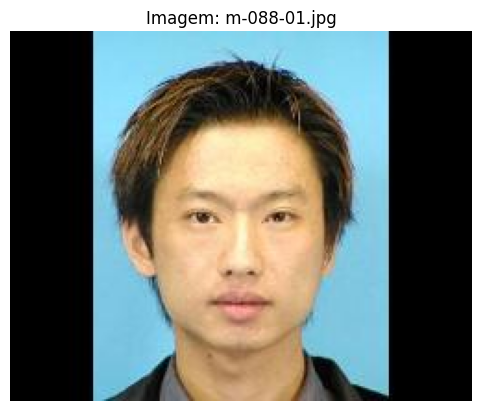

Text(value='', description='Rótulo:', placeholder='0 para Homem, 1 para Mulher')

In [26]:
import os
import random
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

# Configurar o matplotlib para renderizar no notebook
%matplotlib inline

# Configurar a seed para replicabilidade
random.seed(23)

# Função para listar arquivos em um diretório
def list_files_in_folder(folder_path):
    """Lista todos os arquivos em um diretório."""
    try:
        file_list = os.listdir(folder_path)
        return file_list
    except FileNotFoundError:
        print(f"Erro: Diretório não encontrado: {folder_path}")
        return []

# Função de pré-processamento: preserva proporção e adiciona padding
def preprocess_images_with_aspect_ratio(input_folder, output_folder, target_size=(250, 200)):
    """
    Redimensiona as imagens para o tamanho especificado sem distorcer a proporção,
    adicionando padding para manter o tamanho final uniforme.
    """
    os.makedirs(output_folder, exist_ok=True)  # Cria a pasta de destino, se não existir

    for file_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, file_name)

        # Ignorar arquivos que não sejam imagens
        if not (file_name.endswith(".jpg") or file_name.endswith(".png")):
            continue

        try:
            # Abrir a imagem
            img = Image.open(input_path)

            # Redimensionar a imagem mantendo a proporção
            img.thumbnail(target_size)  # Ajusta a imagem para caber dentro do tamanho máximo

            # Criar uma nova imagem com o tamanho exato e um fundo preto
            new_img = Image.new("RGB", target_size, (0, 0, 0))  # Fundo preto
            offset = ((target_size[0] - img.size[0]) // 2, (target_size[1] - img.size[1]) // 2)
            new_img.paste(img, offset)  # Centraliza a imagem redimensionada no fundo

            # Salvar a imagem processada
            output_path = os.path.join(output_folder, file_name)
            new_img.save(output_path)

        except Exception as e:
            print(f"Erro ao processar '{file_name}': {e}")

# Função para dividir o dataset
def split_dataset(source_folder, output_dirs, train_ratio=0.5, val_ratio=0.3, test_ratio=0.2):
    """Divide o dataset em treino, validação e teste."""
    # Criar as pastas de destino, se não existirem
    for key, folder in output_dirs.items():
        os.makedirs(folder, exist_ok=True)

    # Listar todas as imagens no dataset original
    all_files = os.listdir(source_folder)
    all_files = [f for f in all_files if os.path.isfile(os.path.join(source_folder, f))]  # Apenas arquivos

    # Embaralhar os arquivos para garantir aleatoriedade
    random.shuffle(all_files)

    # Dividir o dataset nas proporções sugeridas
    num_files = len(all_files)
    train_split = int(train_ratio * num_files)
    val_split = train_split + int(val_ratio * num_files)

    train_files = all_files[:train_split]
    val_files = all_files[train_split:val_split]
    test_files = all_files[val_split:]

    # Função para copiar os arquivos para suas respectivas pastas
    def copy_files(files, destination_folder):
        for file in files:
            src_path = os.path.join(source_folder, file)
            dest_path = os.path.join(destination_folder, file)
            shutil.copy(src_path, dest_path)

    # Copiar os arquivos para as pastas de treino, validação e teste
    copy_files(train_files, output_dirs["train"])
    copy_files(val_files, output_dirs["val"])
    copy_files(test_files, output_dirs["test"])

    # Exibir o resumo da divisão
    print(f"Divisão do Dataset:")
    print(f"Treino: {len(train_files)} imagens copiadas para {output_dirs['train']}")
    print(f"Validação: {len(val_files)} imagens copiadas para {output_dirs['val']}")
    print(f"Teste: {len(test_files)} imagens copiadas para {output_dirs['test']}")

    return train_files  # Retorna apenas os arquivos de treinamento

# Função de anotação interativa com barra de progresso
def annotate_images(folder, files):
    """Exibe a imagem e coleta rótulo diretamente no notebook, com barra de progresso."""
    annotations = []
    total_files = len(files)  # Total de arquivos para cálculo do progresso

    # Criar barra de progresso
    progress_bar = widgets.IntProgress(
        value=0,
        min=0,
        max=total_files,
        description='Progresso:',
        style={'description_width': 'initial'}
    )
    progress_label = widgets.Label(value=f"0 de {total_files} imagens anotadas.")
    display(progress_bar, progress_label)

    def process_image(file_index):
        clear_output(wait=True)  # Limpa a saída anterior
        display(progress_bar, progress_label)  # Reexibe a barra de progresso
        if file_index < len(files):
            file = files[file_index]
            file_path = os.path.join(folder, file)
            try:
                img = Image.open(file_path)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Imagem: {file}")
                plt.show()

                # Input interativo para o rótulo
                label_box = widgets.Text(
                    description="Rótulo:",
                    placeholder="0 para Homem, 1 para Mulher",
                )

                def on_submit(change):
                    label = label_box.value.strip()
                    if label in ['0', '1']:
                        annotations.append(f"{file},{label}")
                        progress_bar.value += 1  # Atualiza a barra de progresso
                        progress_label.value = f"{progress_bar.value} de {total_files} imagens anotadas."
                        print(f"Imagem '{file}' anotada como: {label}")
                        label_box.value = ""  # Limpa a entrada
                        process_image(file_index + 1)  # Passa para a próxima imagem
                    else:
                        print("Entrada inválida! Digite '0' ou '1'.")

                label_box.on_submit(on_submit)
                display(label_box)
            except Exception as e:
                print(f"Erro ao abrir '{file}': {e}")
                process_image(file_index + 1)  # Pula para a próxima imagem
        else:
            # Quando terminar as imagens, salva o arquivo
            output_labels_file = "annotations.csv"
            with open(output_labels_file, 'w') as f:
                f.write("filename,label\n")  # Cabeçalho
                f.write("\n".join(annotations))
            print(f"Anotações concluídas e salvas em '{output_labels_file}'.")
            clear_output(wait=True)  # Limpa a saída final
            print("Processo concluído!")

    # Iniciar o processo pela primeira imagem
    process_image(0)

# Caminho do dataset original
photos_folder = "photos"
processed_photos_folder = "processed_photos"

# Pastas de destino para treino, validação e teste
output_dirs = {
    "train": "dataset/train",
    "val": "dataset/val",
    "test": "dataset/test"
}

# Pré-processar as imagens preservando a proporção
preprocess_images_with_aspect_ratio(photos_folder, processed_photos_folder)

# Verificar se há arquivos no diretório
if not list_files_in_folder(processed_photos_folder):
    print("Nenhum arquivo encontrado no diretório fornecido. Verifique o caminho.")
else:
    # Primeiro, dividir o dataset e obter os arquivos de treinamento
    train_files = split_dataset(processed_photos_folder, output_dirs)

    # Realizar a anotação apenas para os arquivos de treinamento
    annotate_images(output_dirs["train"], train_files)


3 - Desenvolvimento da arquitetura CNN